In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
raw = pd.read_csv('datasets/train_cleaned.csv')

In [80]:
raw.head()

,date,series_id,value
0,2000-01-03,AAA10Y,-1.036107
1,2000-01-04,AAA10Y,-0.967114
2,2000-01-05,AAA10Y,-1.059104
3,2000-01-06,AAA10Y,-1.082102
4,2000-01-07,AAA10Y,-1.036107


In [81]:
df = raw.pivot(index = "date", columns = "series_id", values = "value")
df.fillna(method='ffill')

series_id,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-1.036107,NaN,-1.289859,NaN,NaN,NaN,NaN,NaN,1.219482,-1.152743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073020
2000-01-04,-0.967114,NaN,-1.250705,NaN,NaN,NaN,NaN,NaN,1.219600,-1.064182,...,NaN,NaN,NaN,NaN,0.782637,NaN,NaN,NaN,NaN,1.903709
2000-01-05,-1.059104,NaN,-1.315961,NaN,NaN,NaN,NaN,NaN,1.219482,-1.049231,...,NaN,NaN,NaN,NaN,0.735149,-1.588500,-1.577472,NaN,NaN,-0.355597
2000-01-06,-1.082102,NaN,-1.315961,NaN,NaN,NaN,NaN,NaN,1.219364,-1.055556,...,NaN,NaN,NaN,NaN,0.806381,-1.588500,-1.577472,NaN,NaN,-0.381094
2000-01-07,-1.036107,NaN,-1.276807,NaN,NaN,NaN,NaN,NaN,1.219010,-1.072808,...,NaN,NaN,NaN,NaN,0.877613,-1.588500,-1.577472,NaN,NaN,-0.361017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-26,-1.289080,-0.503413,-1.172398,0.859595,0.214748,-0.397553,0.193850,-1.344031,-0.833333,-0.168226,...,-0.070521,0.763859,2.116434,-0.349778,-0.352330,1.718264,1.726762,2.646145,-1.151405,-0.222891
2017-12-27,-1.312078,-0.503413,-1.198500,0.859595,0.214748,-0.397553,0.193850,-1.344031,-0.817850,-0.148099,...,-0.070521,0.763859,2.121779,-0.349778,-0.404567,1.719144,1.727352,2.646145,-1.151405,-0.497939
2017-12-28,-1.312078,-0.503413,-1.198500,0.859595,0.214748,-0.397553,0.193850,-1.344031,-0.845979,-0.119346,...,-0.070521,0.763859,2.134184,-0.301277,-0.285846,1.719144,1.727352,2.646145,-1.151405,-0.509784


## Technical Indecator

In [100]:
def get_technical(sp500):
    tech = sp500.copy()
    tech['ma7'] = tech["SP500"].rolling(7).mean()
    tech['ma21'] = tech["SP500"].rolling(21).mean()
    tech['26ema'] = tech["SP500"].ewm(span=26).mean()
    tech['12ema'] = tech["SP500"].ewm(span=12).mean()
    tech['MACD'] = (tech['12ema']-tech['26ema'])
    tech['20sd'] = tech["SP500"].rolling(20).std()
    tech['upper_band'] = tech['ma21'] + (tech['20sd']*2)
    tech['lower_band'] = tech['ma21'] - (tech['20sd']*2)
    tech['ema'] = tech["SP500"].ewm(com=0.5).mean()
    tech['momentum'] = tech["SP500"].diff()
    tech = tech.drop(columns = "SP500").shift(periods=1)
    tech["value"] = sp500["SP500"]
    return tech[["ma7","ma21","26ema","12ema","MACD","ema","momentum"]]

In [102]:
tech = get_technical(df[["SP500"]])

## Fourier transforms 

In [115]:
df[['SP500']].dropna()

series_id,SP500
date,
2011-02-14,-1.282808
2011-02-15,-1.293675
2011-02-16,-1.272723
2011-02-17,-1.262360
2011-02-18,-1.255855
...,...
2017-12-25,2.118224
2017-12-26,2.116434
2017-12-27,2.121779


In [127]:
fft_list[len(fft_list)//2]

(-0.28120815157582385+0.7793503513501845j)

In [129]:
df[['SP500']].dropna() 

series_id,SP500
date,
2011-02-14,-1.282808
2011-02-15,-1.293675
2011-02-16,-1.272723
2011-02-17,-1.262360
2011-02-18,-1.255855
...,...
2017-12-25,2.118224
2017-12-26,2.116434
2017-12-27,2.121779


In [136]:
data_FT = df[['SP500']].dropna() 
close_fft = np.fft.fft(np.asarray(data_FT['SP500'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list)
    fft_list_m10[num_:-num_]=0
    data_FT["ft"+str(num_)] = np.fft.ifft(fft_list_m10).real

In [137]:
data_FT

series_id,SP500,ft3,ft6,ft9,ft100
date,,,,,
2011-02-14,-1.282808,0.184458,0.297771,0.348702,0.224832
2011-02-15,-1.293675,0.174734,0.276442,0.318671,-0.151781
2011-02-16,-1.272723,0.164996,0.255069,0.288571,-0.505474
2011-02-17,-1.262360,0.155246,0.233655,0.258411,-0.822690
2011-02-18,-1.255855,0.145483,0.212205,0.228200,-1.092577
...,...,...,...,...,...
2017-12-25,2.118224,0.232860,0.403643,0.497479,1.919659
2017-12-26,2.116434,0.223210,0.382584,0.467938,1.652650
2017-12-27,2.121779,0.213545,0.361463,0.438281,1.337465


In [138]:
data_FT.to_csv("datasets/FT.csv")

<AxesSubplot:xlabel='date'>

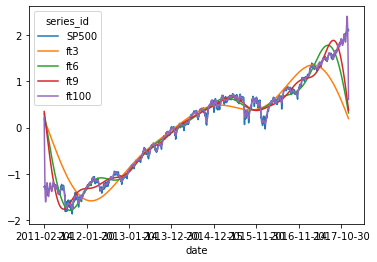

In [139]:
data_FT.plot()

## ARIMA

In [105]:
from skits.pipeline import ForecasterPipeline
from skits.feature_extraction import (AutoregressiveTransformer,
                                      SeasonalTransformer)
from skits.preprocessing import (ReversibleImputer,
                                 DifferenceTransformer)
from skits.pipeline import ForecasterPipeline
from sklearn.preprocessing import StandardScaler


In [106]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              RandomForestRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [71]:
ARIMA = AutoregressiveTransformer(num_lags=1)

NameError: name 'y' is not defined

In [70]:
tt = train.pivot(index = "date", columns = "series_id", values = "value")

In [72]:
tt

series_id,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-1.036107,NaN,-1.289859,NaN,NaN,NaN,NaN,NaN,1.219482,-1.152743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073020
2000-01-04,-0.967114,NaN,-1.250705,NaN,NaN,NaN,NaN,NaN,1.219600,-1.064182,...,NaN,NaN,NaN,NaN,0.782637,NaN,NaN,NaN,NaN,1.903709
2000-01-05,-1.059104,NaN,-1.315961,NaN,NaN,NaN,NaN,NaN,1.219482,-1.049231,...,NaN,NaN,NaN,NaN,0.735149,-1.588500,-1.577472,NaN,NaN,-0.355597
2000-01-06,-1.082102,NaN,-1.315961,NaN,NaN,NaN,NaN,NaN,1.219364,-1.055556,...,NaN,NaN,NaN,NaN,0.806381,NaN,NaN,NaN,NaN,-0.381094
2000-01-07,-1.036107,NaN,-1.276807,NaN,NaN,NaN,NaN,NaN,1.219010,-1.072808,...,NaN,NaN,NaN,NaN,0.877613,NaN,NaN,NaN,NaN,-0.361017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-26,-1.289080,NaN,-1.172398,NaN,NaN,NaN,NaN,NaN,-0.833333,-0.168226,...,NaN,NaN,2.116434,-0.349778,-0.352330,NaN,NaN,NaN,NaN,-0.222891
2017-12-27,-1.312078,NaN,-1.198500,NaN,NaN,NaN,NaN,NaN,-0.817850,-0.148099,...,NaN,NaN,2.121779,-0.349778,-0.404567,1.719144,1.727352,NaN,NaN,-0.497939
2017-12-28,-1.312078,NaN,-1.198500,NaN,NaN,NaN,NaN,NaN,-0.845979,-0.119346,...,NaN,NaN,2.134184,-0.301277,-0.285846,NaN,NaN,NaN,NaN,-0.509784
